# PHAS0030 Assignment Week 5: 

We will investigate the heat equation in two forms:

First, a 2D steady-state form.

Second, a 2D time varying solution.

We will be looking at a bar of length 21 metres and width 15 metres. Where at the end of the bar where the length is 21 metres the temperature will be 400 Kelvin, and all other parts at 300 Kelvin.

The equation we will be working with is a partial differential equation of the elliptic form:

$$
\frac{\partial^2 \theta}{\partial x^2} + \frac{\partial^2 \theta}{\partial y^2} = 0
$$

Where:

$ x $ is the length of the bar

$ y $ is the width of the bar

$ \theta $ is the temperature

In [1]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1. Set up the SOR solver

In [2]:
def update_SOR(phi, M, N, omega):
    """
    the successive over-relaxation (SOR) method
    
    Input:
    phi = Initial 2D array 
    M = number of rows
    N = number of columns
    omega = parameter used for the SOR method
    
    Output:
    phiout = 2D array after SOR has been applied
    
    """
    # We exclude i=0, i=M, j=0 and j=N as they are boundaries
    
    for i in range(1, M-1):
        for j in range(1, N-1):
            phi[i,j] = ((1 + omega)/4)*(phi[i-1,j] + phi[i+1,j] + phi[i,j-1] + phi[i,j+1]) - omega*phi[i,j]
            
    phiout = np.copy(phi)
    
    return phiout

### 2. Set up the array and initial conditions

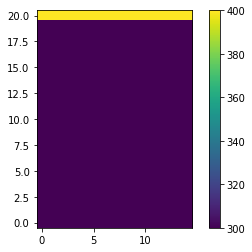

In [3]:
# dx and dy must be equal
dx = 1
dy = 1

# Length and width of bar
length = 21 #m
width = 15 #m

# Setting up array for intial conditios of bar 
M = int(length/dx)
N = int(width/dy)
T1 = 300
T2 = 400
theta = T1 * np.ones((M, N))
theta[M-1,:] = T2

# Plot initial guess
plt.imshow(theta, origin='lower')
plt.colorbar()
plt.show()

### 3. Run the solver and plot the result

In [4]:
# Setting omega and tolerance for the SOR function itteration
omega = 0.1
delta = np.abs(np.max(np.max(theta)))
tol = 0.1
iter = 0

while delta > tol:
    thetain = np.copy(theta)
    theta = update_SOR(theta, M, N, omega)
    delta = np.abs(np.max(np.max(theta - thetain)))
    iter += 1
    
print("Finished after ",iter," iterations")

Finished after  60  iterations


In [5]:
delta = np.abs(np.max(np.max(theta - thetain)))

print(delta)

0.09857724239560639


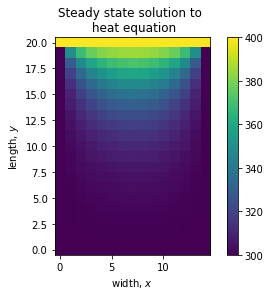

In [6]:
# Final temperature distribution
plt.imshow(theta, origin='lower')
plt.title("Steady state solution to \n heat equation")
plt.xlabel(r"width, $ x $")
plt.ylabel(r"length, $ y $")
plt.colorbar()
plt.show()

### 4. Time evolution function

In [7]:
def update_temperature2D(temper, M, N, zeta):
    """
    Perform explicit forward FD update for heat equation
    
    Inputs:
    temper = Array of temperature at present timestep
    n = Temperature timestep to calculate
    zeta = Constant of proportionality
    
    Output:
    temper_next = Array of temperature at next timestep
    """
    
    for i in range(1, M - 1):
        for j in range(1, N - 1):
            temper[i,j] = temper[i,j] + zeta*(temper[i + 1,j] + temper[i - 1,j] + temper[i,j + 1] + temper[i,j - 1] - 4*temper[i,j])
    
    temper_next = np.copy(temper)
    
    return temper_next

### 5. Set up initial conditions

In [8]:
# dx and dy must be equal
dx = 1
dy = 1

# Length and width of bar
length = 21 #m
width = 15 #m

# Setting up array for intial conditios of bar 
M = int(length/dx)
N = int(width/dy)
T1 = 300
T2 = 400
theta0 = T1 * np.ones((M, N))
theta0[M-1,:] = T2

### 6. Propagate the solution and store selected points

In [9]:
Nt = 800
zeta = 0.1

for i in range(Nt):
    theta_next = update_temperature2D(theta0, M, N, zeta)
    theta0 = theta_next

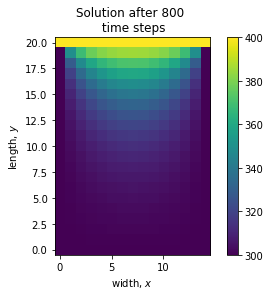

In [10]:
# Plot final
plt.imshow(theta0, origin='lower')
plt.title("Solution after " + str(Nt) + " \n time steps")
plt.xlabel(r"width, $ x $")
plt.ylabel(r"length, $ y $")
plt.colorbar()
plt.show()

### Plot the final and steady-state solutions
Below we have plotted the fianl temperature maps of both of the functions we wrote above aswell as plotting the difference heat map below.

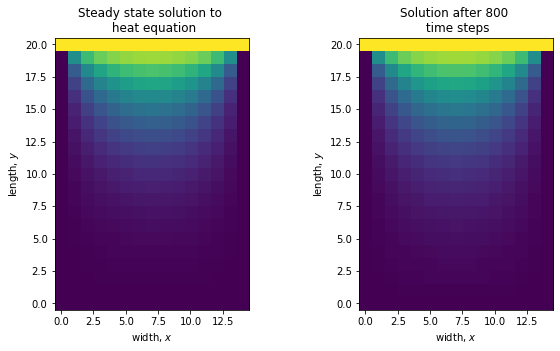

In [11]:
fig = plt.figure(figsize=(10,5))

SOR_fig = fig.add_subplot(121)
SOR_im = SOR_fig.imshow(theta, origin='lower')
SOR_fig.set_title("Steady state solution to \n heat equation")
plt.xlabel(r"width, $ x $")
plt.ylabel(r"length, $ y $")

timeStep_fig = fig.add_subplot(122)
timeStep_im = timeStep_fig.imshow(theta0, origin='lower')
timeStep_fig.set_title("Solution after " + str(Nt) + " \n time steps")
plt.xlabel(r"width, $ x $")
plt.ylabel(r"length, $ y $")

plt.show()

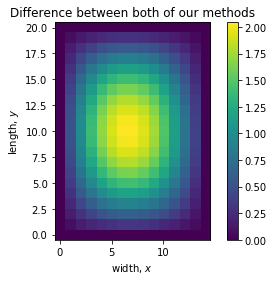

In [12]:
difference = abs(theta - theta0)

plt.imshow(difference, origin='lower')
plt.title("Difference between both of our methods")
plt.xlabel(r"width, $ x $")
plt.ylabel(r"length, $ y $")
plt.colorbar()
plt.show()